In [1]:
import pandas as pd
train=pd.read_csv("train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.shape

(614, 13)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
train.describe(include=[object])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [13]:
train=train.drop(['Loan_ID'],axis=1)

In [15]:
#EDA

In [19]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

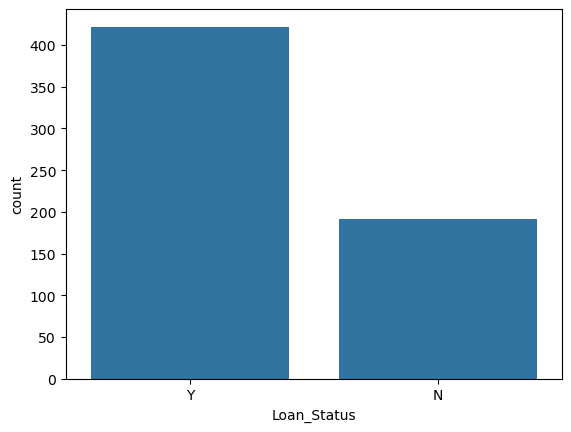

In [21]:
import seaborn as sns

sns.countplot(x=train["Loan_Status"])

In [23]:
train['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

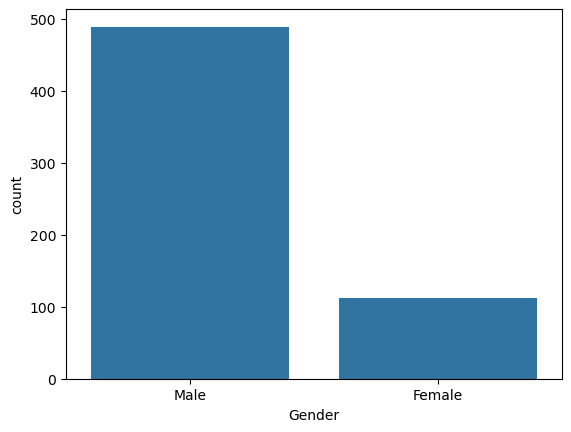

In [25]:
sns.countplot(x=train['Gender'])

<Axes: xlabel='Gender', ylabel='count'>

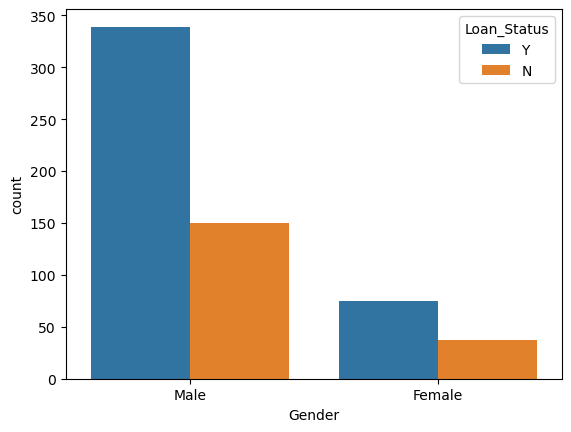

In [27]:
sns.countplot(x=train['Gender'],hue=train['Loan_Status'])

<Axes: xlabel='Married', ylabel='count'>

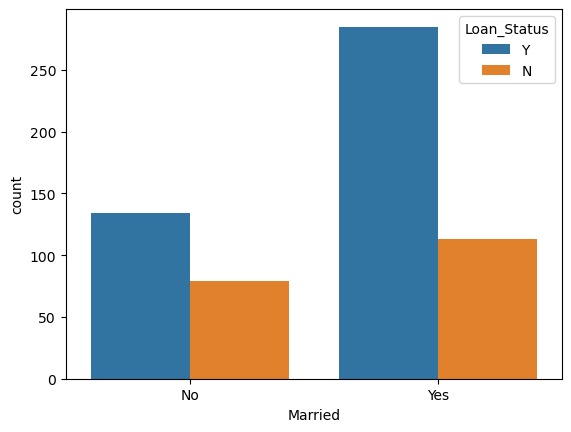

In [29]:
sns.countplot(x='Married',data=train,hue='Loan_Status')

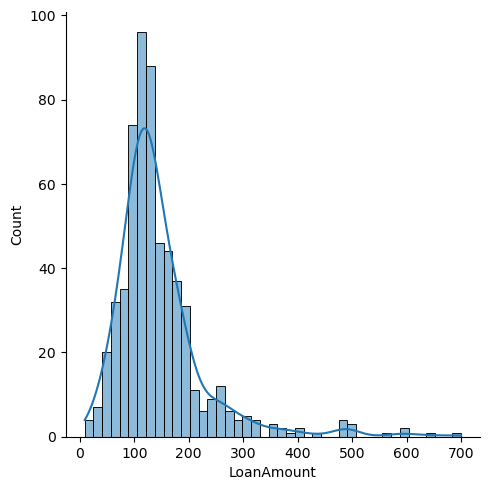

In [31]:
sns.displot(train['LoanAmount'],kde=True)

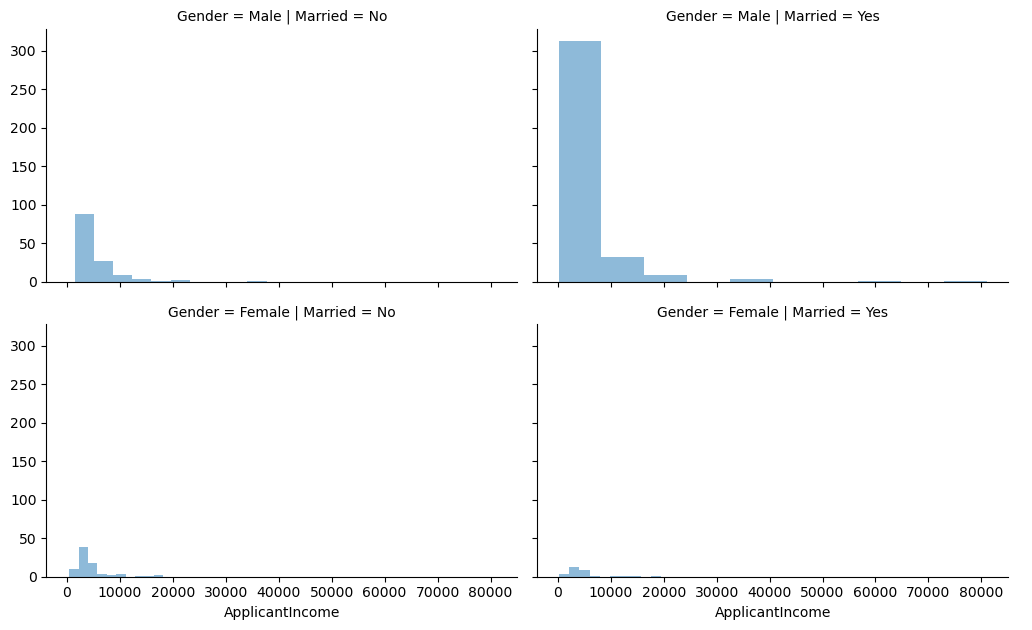

In [33]:
import matplotlib.pyplot as plt
grid=sns.FacetGrid(train,row='Gender',col='Married',height=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

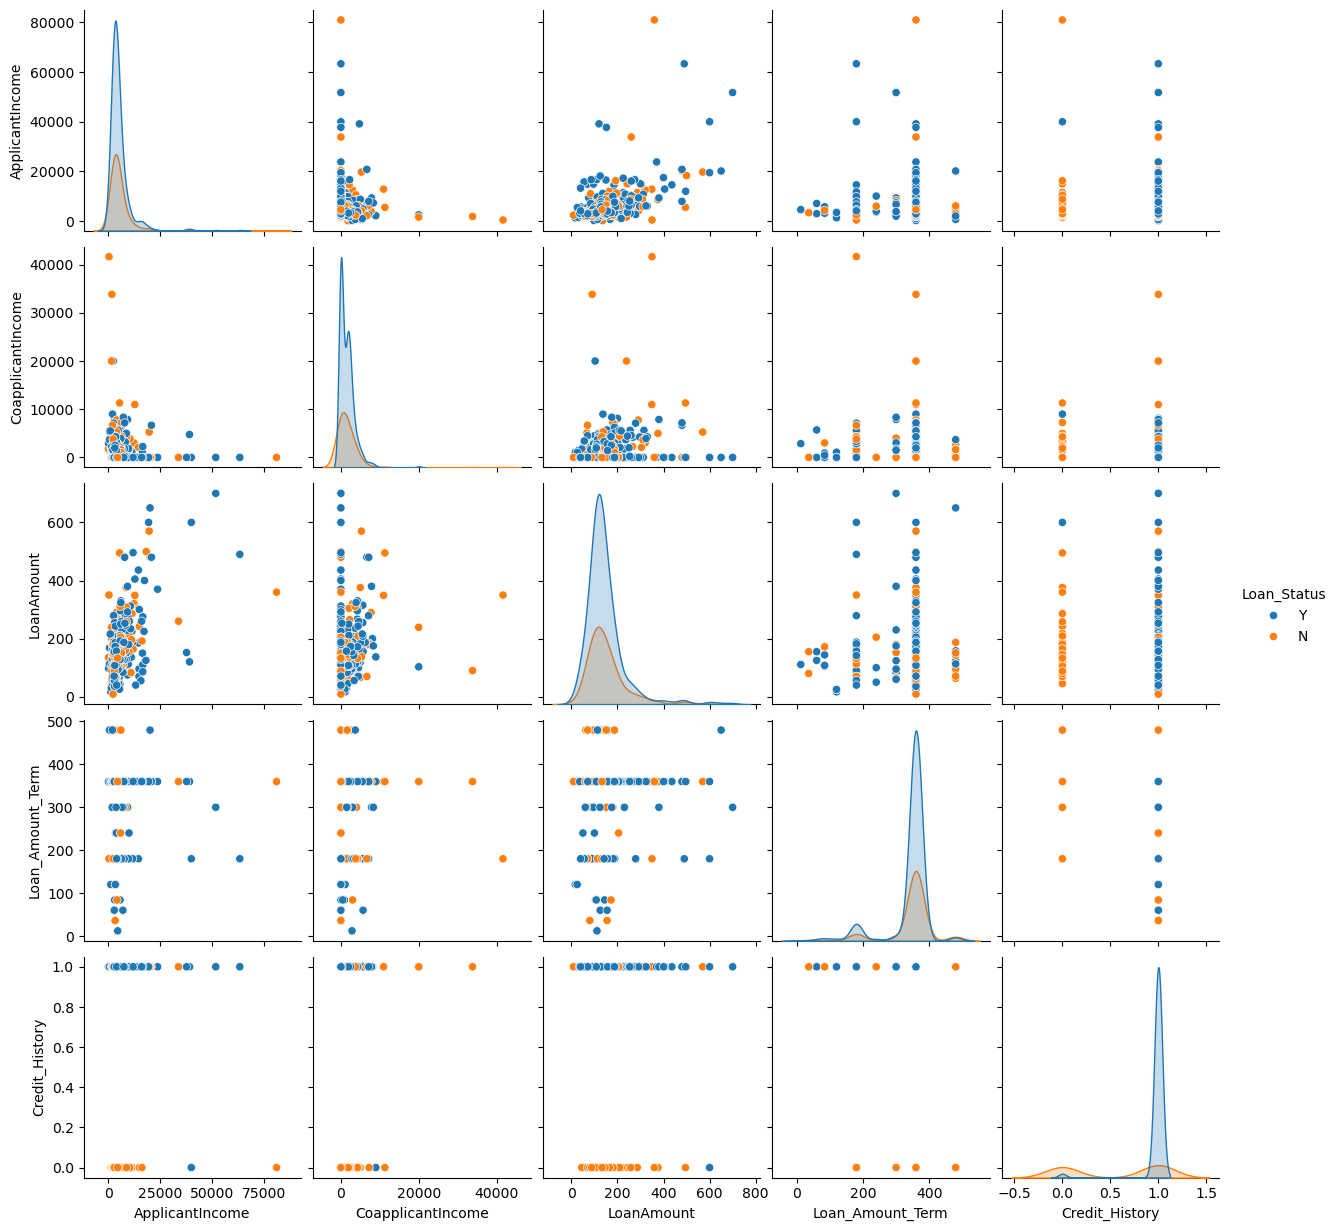

In [35]:
sns.pairplot(train,hue='Loan_Status',height=2.5)

In [39]:
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])

In [45]:
train['Married']=train['Married'].fillna(train['Married'].mode()[0])

In [51]:
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

C:\Users\anant\AppData\Local\Temp\ipykernel_7784\1158697795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)


In [53]:
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

C:\Users\anant\AppData\Local\Temp\ipykernel_7784\2772363314.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)


In [57]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)

C:\Users\anant\AppData\Local\Temp\ipykernel_7784\3313255668.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)


In [59]:
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

C:\Users\anant\AppData\Local\Temp\ipykernel_7784\3441119898.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)


In [63]:
train['Credit_History'].skew()

-1.8823610612186696

In [65]:
train['Credit_History'].fillna(train['Credit_History'].median(),inplace=True)

C:\Users\anant\AppData\Local\Temp\ipykernel_7784\3183111871.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Credit_History'].fillna(train['Credit_History'].median(),inplace=True)


In [67]:
train.isna().sum()

Gender                 0
Married                0
Dependents           614
Education              0
Self_Employed        614
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount           614
Loan_Amount_Term     614
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [69]:
from sklearn.preprocessing import LabelEncoder
feature_col=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le=LabelEncoder()
for col in feature_col:
    train[col]=le.fit_transform(train[col])

In [73]:
train.Loan_Status=train.Loan_Status.replace({"Y":1,"N":0})

C:\Users\anant\AppData\Local\Temp\ipykernel_7784\3684876901.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.Loan_Status=train.Loan_Status.replace({"Y":1,"N":0})


In [75]:
train['total_income']=train['ApplicantIncome']+train['CoapplicantIncome']